In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('/content/telecom_customer_churn.csv')

# Xem trước dữ liệu
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
# Xem thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [ ]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]  # Lọc ra các cột có giá trị null

# In ra tên cột và số lượng giá trị null
print(null_columns)

Offer                                3877
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Churn Category                       5174
Churn Reason                         5174
dtype: int64


In [ ]:
# Kiểm tra số lượng hàng trùng lặp
duplicate_rows = df[df.duplicated()]
print(f"Số lượng hàng trùng lặp: {duplicate_rows.shape[0]}")

Số lượng hàng trùng lặp: 0


In [2]:
# Xóa cột có quá nhiều giá trị phân loại và không ảnh hưởng đến mô hình dự đoán
data = df.drop(['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason'], axis=1)

In [3]:
# Lấy danh sách các cột phân loại và cột số
cat_columns = list(data.select_dtypes(include='object').columns)
num_columns = list(data.select_dtypes(exclude='object').columns)

In [ ]:
data.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,NaN,Yes,42.39,No,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,NaN,Yes,10.69,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,NaN,Yes,7.38,No,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


Xử lý giá trị null

In [4]:
# Xử lý giá trị null cho các cột số và cột phân loại
for column in cat_columns:
    data[column] = data[column].apply(lambda x: 'No' if pd.isnull(x) else x)

for column in num_columns:
  data[column] = data[column].apply(lambda x: 0 if pd.isnull(x) else x)
data.isna().sum()

,0
Gender,0
Age,0
Married,0
Number of Dependents,0
Number of Referrals,0
Tenure in Months,0
Offer,0
Phone Service,0
Avg Monthly Long Distance Charges,0
Multiple Lines,0


In [ ]:
# Thống kê mô tả dữ liệu
data.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


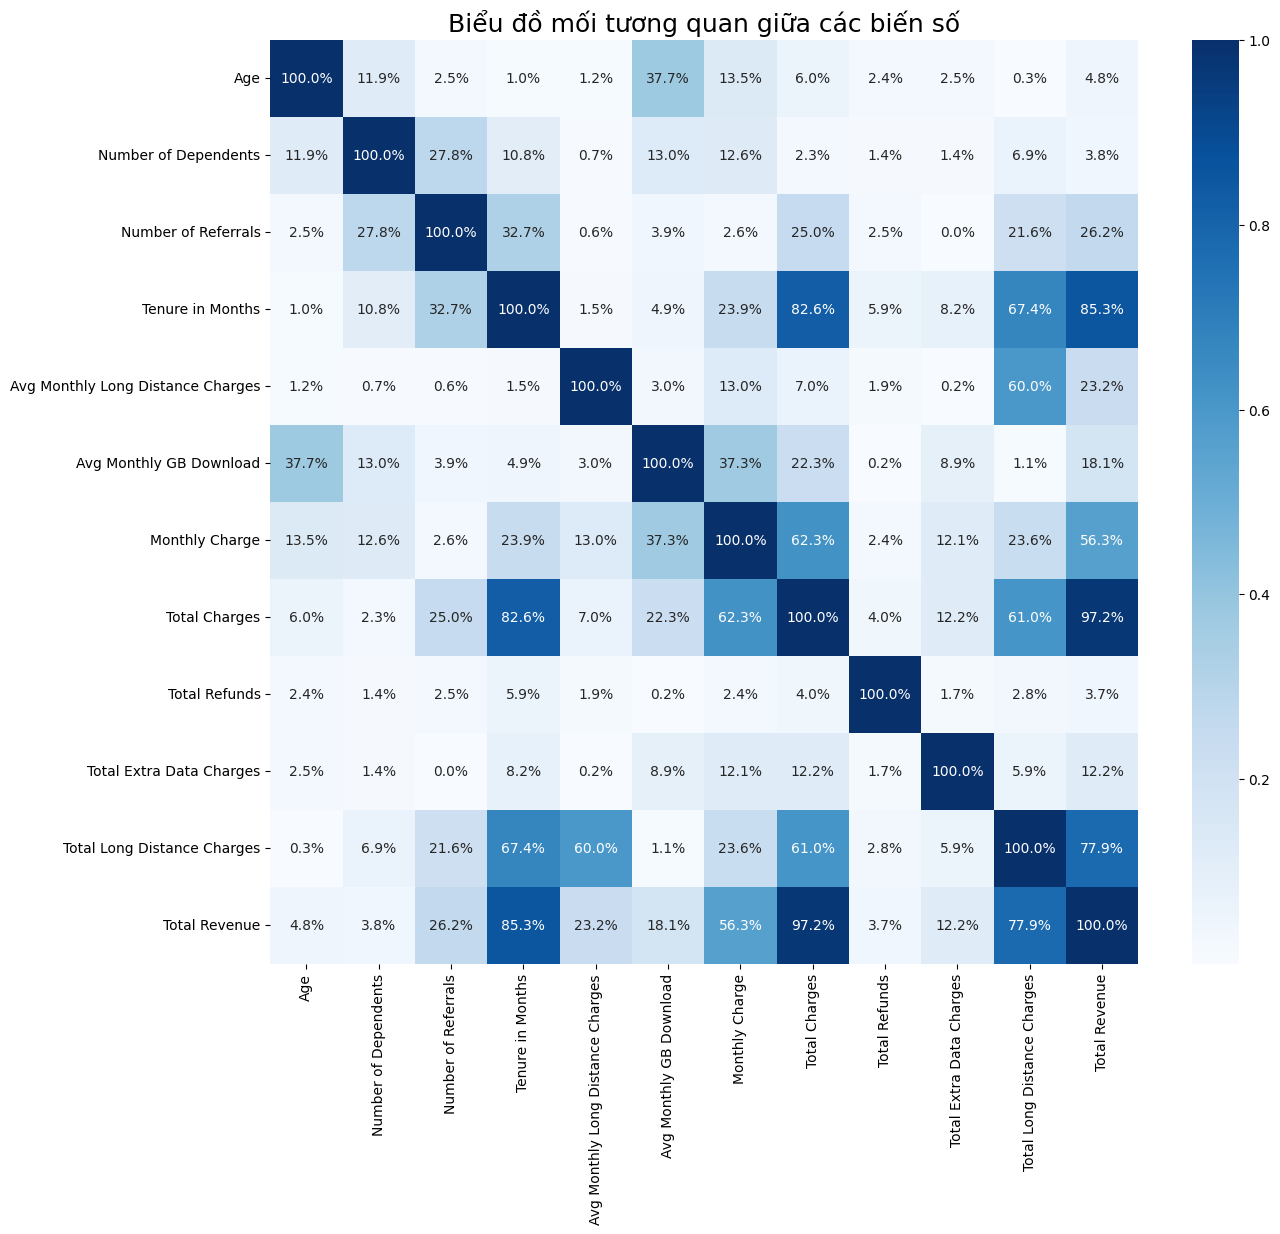

Cặp biến có tương quan cao nhất giữa các biến số:
Age                                      Avg Monthly GB Download
Number of Dependents                         Number of Referrals
Number of Referrals                             Tenure in Months
Tenure in Months                                   Total Revenue
Avg Monthly Long Distance Charges    Total Long Distance Charges
Avg Monthly GB Download                                      Age
Monthly Charge                                     Total Charges
Total Charges                                      Total Revenue
Total Refunds                                   Tenure in Months
Total Extra Data Charges                           Total Revenue
Total Long Distance Charges                        Total Revenue
Total Revenue                                      Total Charges
dtype: object


In [ ]:
# Tính ma trận tương quan
corr_mat = data[num_columns].corr()

# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(14, 12))
sns.heatmap(corr_mat.abs(), annot=True, fmt=".1%", cmap='Blues')

# Thêm tiêu đề
plt.title('Biểu đồ mối tương quan giữa các biến số', fontsize=18)
plt.show()

# Đặt các giá trị trên đường chéo của ma trận tương quan về 0
for i in range(len(corr_mat)):
    corr_mat.iloc[i, i] = 0.0

# Tìm các cặp biến có tương quan cao nhất sau khi bỏ đường chéo
print('Cặp biến có tương quan cao nhất giữa các biến số:')
print(corr_mat.abs().idxmax())

Xóa những cột biến số có mối tương quan cao với nhau để tránh đa cộng tuyến

In [5]:
data = data.drop(['Total Revenue', 'Tenure in Months', 'Total Long Distance Charges'],axis=1)

In [6]:
# Cập nhật danh sách các cột phân loại và cột số
cat_columns = list(data.select_dtypes(include='object').columns)
num_columns = list(data.select_dtypes(exclude='object').columns)

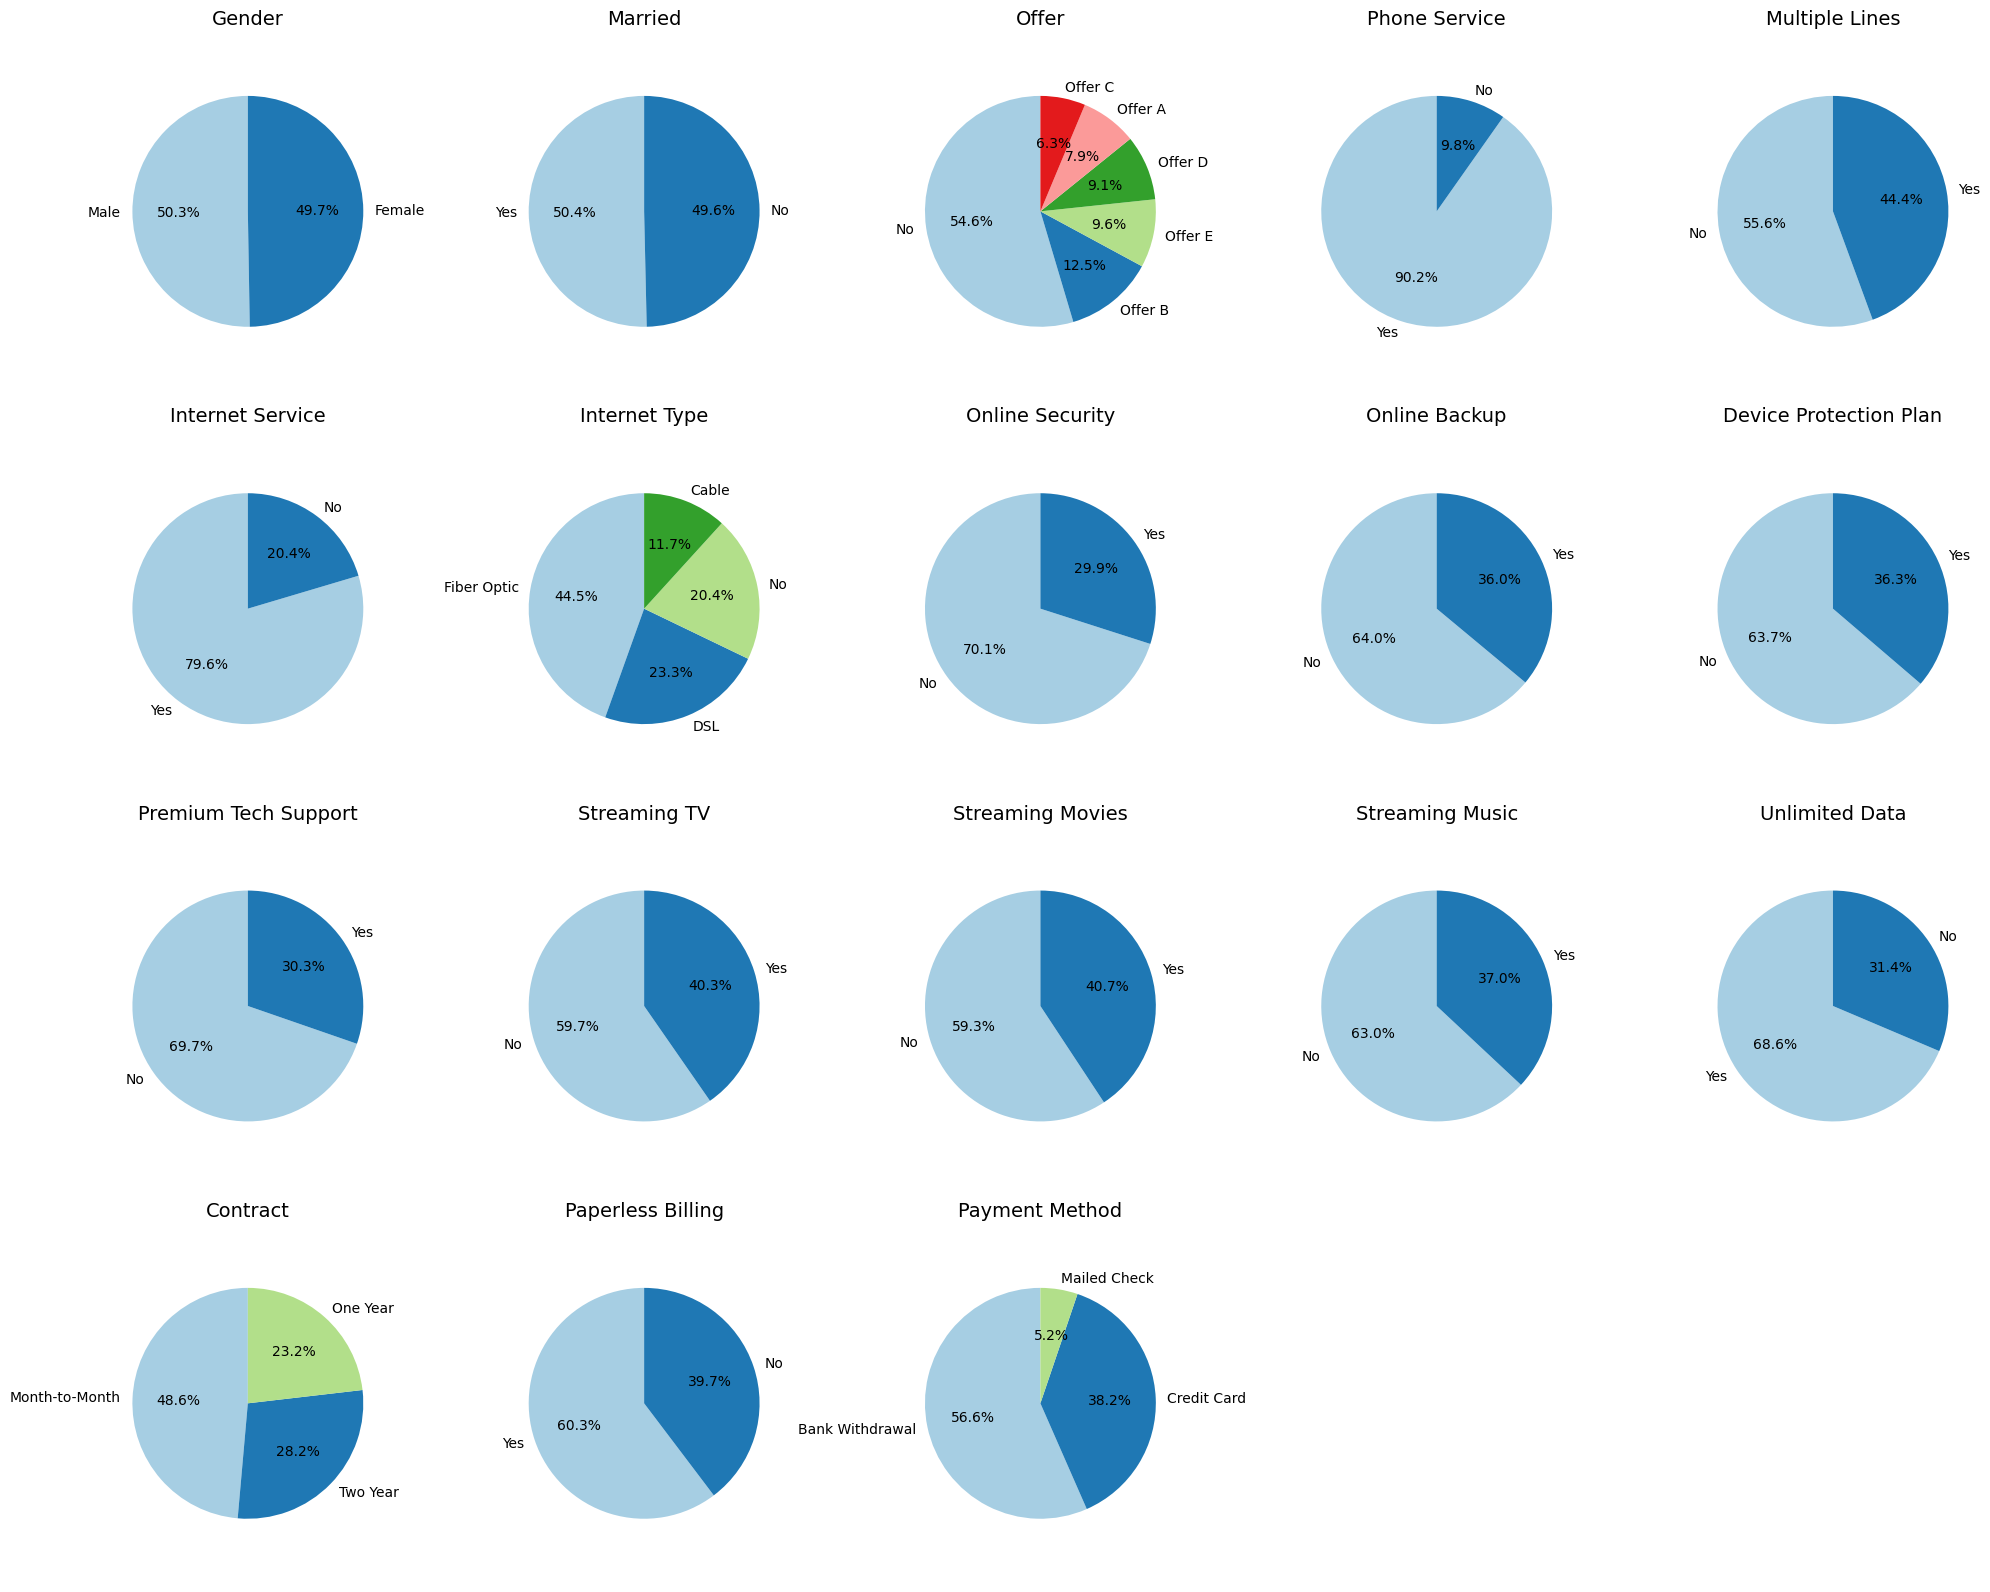

In [ ]:
# Lấy danh sách các cột phân loại (object),
cat_columns = data.select_dtypes(include='object').columns

# Tạo khung vẽ với kích thước lớn để chứa nhiều biểu đồ
fig = plt.figure(figsize=(20, 20))

# Lặp qua từng cột phân loại và vẽ biểu đồ tròn
for i, col in enumerate(cat_columns, 1):
    plt.subplot(5, 5, i)  # Vẽ biểu đồ con, tạo lưới 5x5
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(col, fontsize=14)  # Tiêu đề là tên cột
    plt.ylabel('')  # Ẩn nhãn trục y để gọn hơn
    plt.axis('equal')  # Đảm bảo biểu đồ tròn hoàn chỉnh

plt.tight_layout()  # Sắp xếp các biểu đồ cho hợp lý
plt.show()

In [7]:
data = data[data["Customer Status"] != "Joined"]

Chuẩn hóa dữ liệu

In [8]:
# Label Encoding Customer Status
status_mapping = {'Churned': 0, 'Stayed': 1}
data['Customer Status'] = data['Customer Status'].map(status_mapping)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Lấy danh sách các cột phân loại có 2 giá trị duy nhất
binary_cols = [col for col in data.select_dtypes(include='object').columns if data[col].nunique() == 2]

# Sử dụng LabelEncoder để mã hóa các cột phân loại 2 giá trị
encoder = LabelEncoder()
for col in binary_cols:
    data[col] = encoder.fit_transform(data[col])

# Kiểm tra lại dữ liệu sau khi mã hóa
data.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Customer Status
0,0,37,1,0,2,No,1,42.39,0,1,...,0,1,One Year,1,Credit Card,65.6,593.30,0.00,0,1
1,1,46,0,0,0,No,1,10.69,1,1,...,1,0,Month-to-Month,0,Credit Card,-4.0,542.40,38.33,10,1
2,1,50,0,0,0,Offer E,1,33.65,0,1,...,0,1,Month-to-Month,1,Bank Withdrawal,73.9,280.85,0.00,0,0
3,1,78,1,0,1,Offer D,1,27.82,0,1,...,0,1,Month-to-Month,1,Bank Withdrawal,98.0,1237.85,0.00,0,0
4,0,75,1,0,3,No,1,7.38,0,1,...,0,1,Month-to-Month,1,Credit Card,83.9,267.40,0.00,0,0


In [10]:
from sklearn.preprocessing import OneHotEncoder
# One-Hot Encoding cho các cột phân loại còn lại
# Lấy danh sách các cột phân loại có 2 giá trị duy nhất
binary_cols = [col for col in data.select_dtypes(include='object').columns if data[col].nunique() > 2]

# Thực hiện One-Hot Encoding, loại bỏ một cột đầu tiên cho mỗi biến để tránh multicollinearity
data = pd.get_dummies(data, columns=binary_cols, drop_first=True)

# Kiểm tra lại dữ liệu
data.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,...,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,37,1,0,2,1,42.39,0,1,16.0,...,False,False,False,False,False,False,True,False,True,False
1,1,46,0,0,0,1,10.69,1,1,10.0,...,False,False,False,False,False,False,False,False,True,False
2,1,50,0,0,0,1,33.65,0,1,30.0,...,False,False,True,False,True,False,False,False,False,False
3,1,78,1,0,1,1,27.82,0,1,4.0,...,False,True,False,False,True,False,False,False,False,False
4,0,75,1,0,3,1,7.38,0,1,11.0,...,False,False,False,False,True,False,False,False,True,False


In [11]:
from sklearn.preprocessing import MinMaxScaler
# Khởi tạo MinMax
scaler = MinMaxScaler()

# Áp dụng Min-Max Scaling cho các cột số
data[num_columns] = scaler.fit_transform(data[num_columns])

# Kiểm tra lại dữ liệu sau khi áp dụng Scaling
data.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,...,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,0.295082,1,0.0,0.181818,1,0.847970,0,1,0.188235,...,False,False,False,False,False,False,True,False,True,False
1,1,0.442623,0,0.0,0.000000,1,0.213843,1,1,0.117647,...,False,False,False,False,False,False,False,False,True,False
2,1,0.508197,0,0.0,0.000000,1,0.673135,0,1,0.352941,...,False,False,True,False,True,False,False,False,False,False
3,1,0.967213,1,0.0,0.090909,1,0.556511,0,1,0.047059,...,False,True,False,False,True,False,False,False,False,False
4,0,0.918033,1,0.0,0.272727,1,0.147630,0,1,0.129412,...,False,False,False,False,True,False,False,False,True,False


Xử lý giá trị outliers

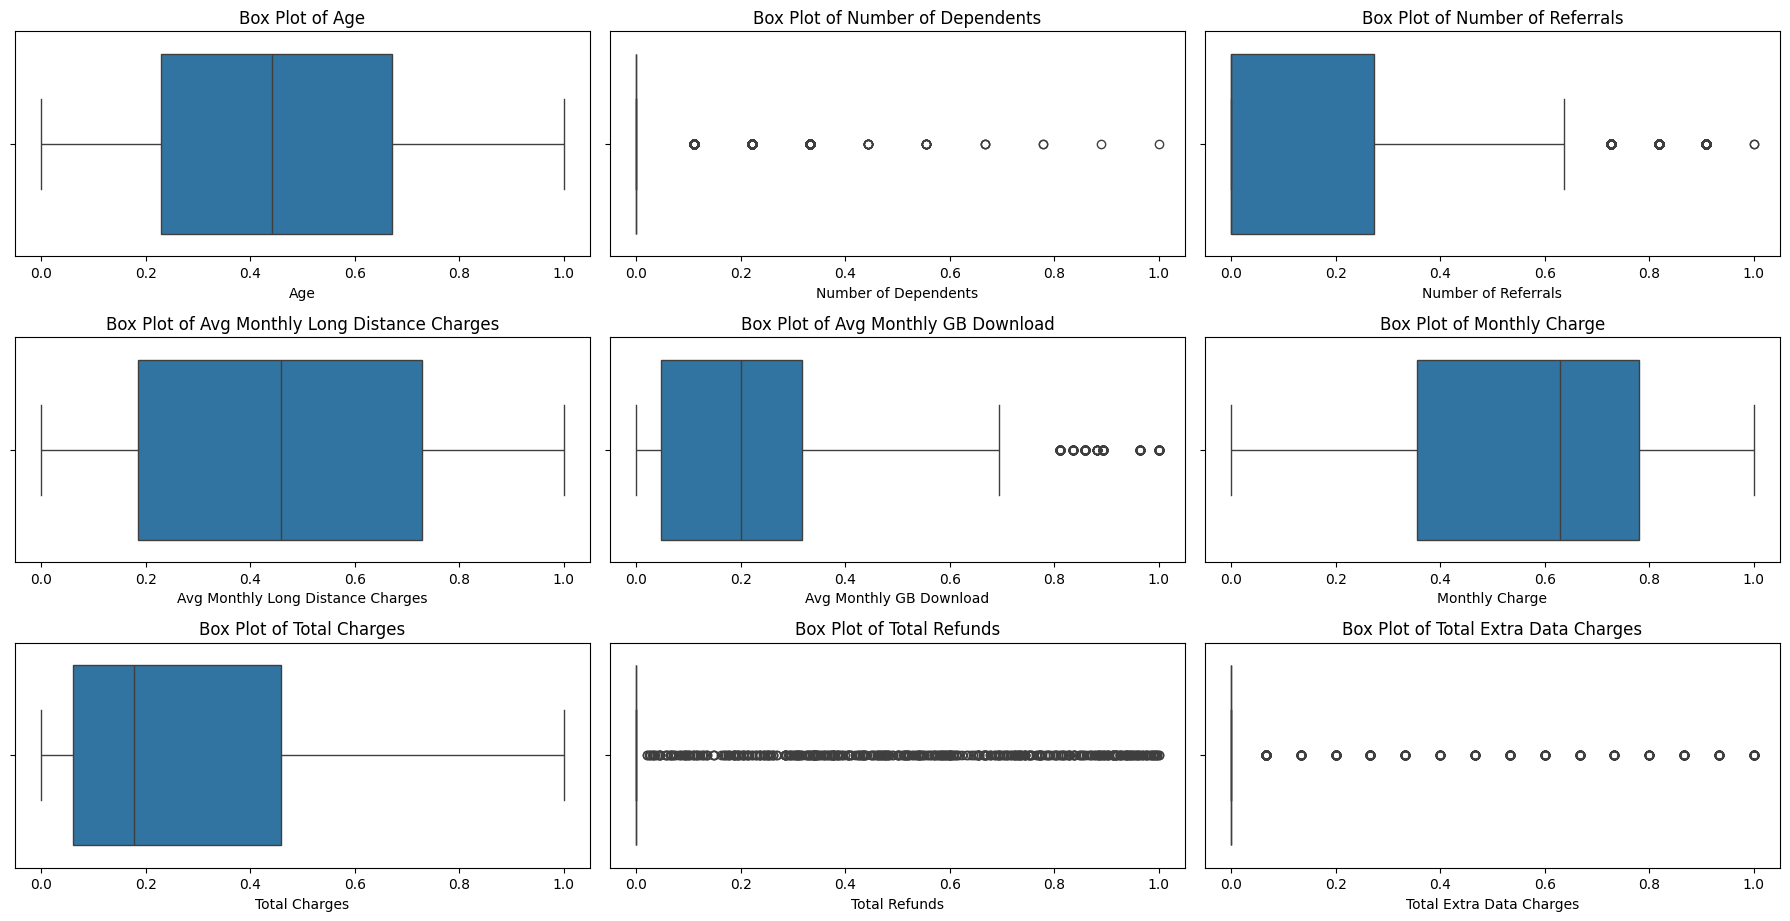

In [12]:
# Đặt số lượng biểu đồ tối đa trên mỗi trang
num_plots_per_page = 15
num_pages = (len(num_columns) + num_plots_per_page - 1) // num_plots_per_page

for page in range(num_pages):
    plt.figure(figsize=(18, 15))
    for i, col in enumerate(num_columns[page * num_plots_per_page:(page + 1) * num_plots_per_page], 1):
        plt.subplot(5, 3, i)
        sns.boxplot(data=data, x=col)
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

In [13]:
numerical_columns = ['Age', 'Number of Referrals',
    'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge'
]

# Xử lý ngoại lai bằng phương pháp IQR
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Giới hạn các giá trị ngoại lai
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Kiểm tra lại dữ liệu sau khi xử lý outlier
data.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,...,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,0.295082,1,0.0,0.181818,1,0.847970,0,1,0.188235,...,False,False,False,False,False,False,True,False,True,False
1,1,0.442623,0,0.0,0.000000,1,0.213843,1,1,0.117647,...,False,False,False,False,False,False,False,False,True,False
2,1,0.508197,0,0.0,0.000000,1,0.673135,0,1,0.352941,...,False,False,True,False,True,False,False,False,False,False
3,1,0.967213,1,0.0,0.090909,1,0.556511,0,1,0.047059,...,False,True,False,False,True,False,False,False,False,False
4,0,0.918033,1,0.0,0.272727,1,0.147630,0,1,0.129412,...,False,False,False,False,True,False,False,False,True,False


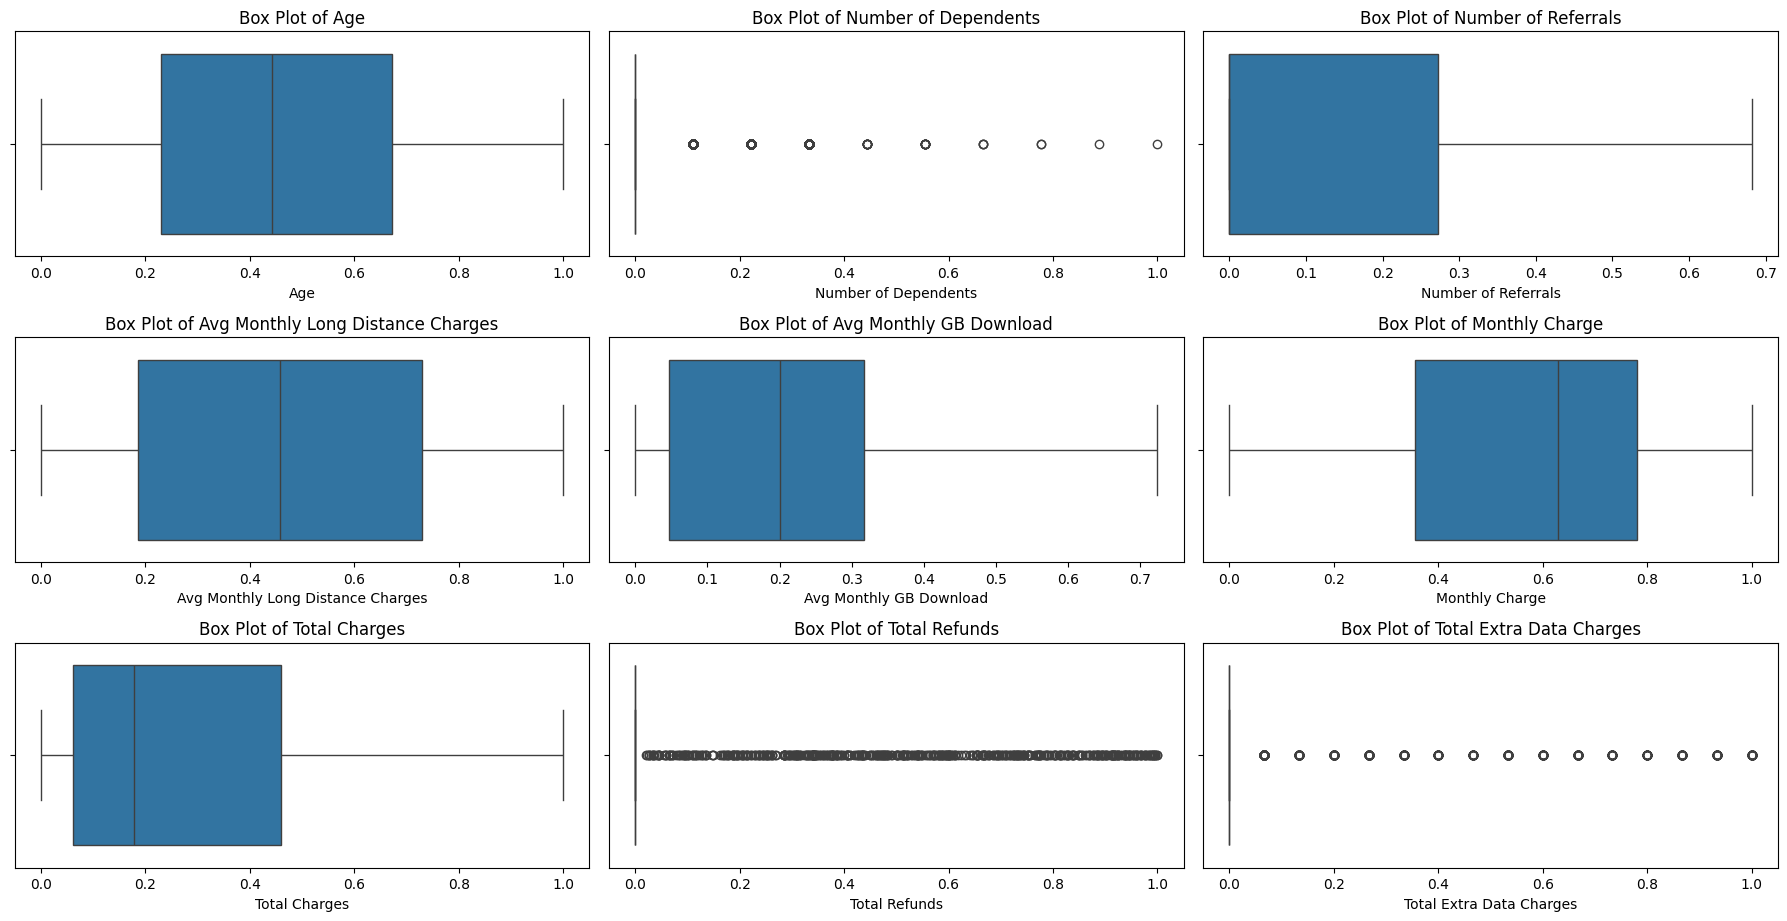

In [14]:
# Đặt số lượng biểu đồ tối đa trên mỗi trang
num_plots_per_page = 15
num_pages = (len(num_columns) + num_plots_per_page - 1) // num_plots_per_page

for page in range(num_pages):
    plt.figure(figsize=(18, 15))
    for i, col in enumerate(num_columns[page * num_plots_per_page:(page + 1) * num_plots_per_page], 1):
        plt.subplot(5, 3, i)
        sns.boxplot(data=data, x=col)
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

Chia dữ liệu

In [15]:
# Chia tập dữ liệu thành biến đầu vào (X) và biến đầu ra (y)
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

Xử lý mất cân bằng

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Kiểm tra số lượng mẫu trong từng lớp sau khi xử lý
print("Sau khi xử lý SMOTE:", Counter(y))

Sau khi xử lý SMOTE: Counter({1: 4720, 0: 4720})


Xây dựng mô hình logistic regression

In [17]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import joblib

In [18]:
from sklearn.linear_model import LogisticRegression
# Khởi tạo mô hình Logistic Regression
modelLG = LogisticRegression(max_iter=1000)  # Tăng max_iter nếu cần để đảm bảo hội tụ)

In [19]:
# Khởi tạo RFECV với cross-validation 5-fold
rfecv = RFECV(estimator=modelLG, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Huấn luyện RFECV trên dữ liệu
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(max_iter=1000), scoring='accuracy')

In [20]:
# Số lượng đặc trưng tối ưu
print("Optimal number of features:", rfecv.n_features_)

# Danh sách các đặc trưng quan trọng được chọn
selected_features = X.columns[rfecv.support_]
print("Selected Features:", selected_features)

Optimal number of features: 31
Selected Features: Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Unlimited Data', 'Paperless Billing',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Offer_Offer A', 'Offer_Offer C',
       'Offer_Offer D', 'Offer_Offer E', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Internet Type_No', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check'],
      dtype='object')


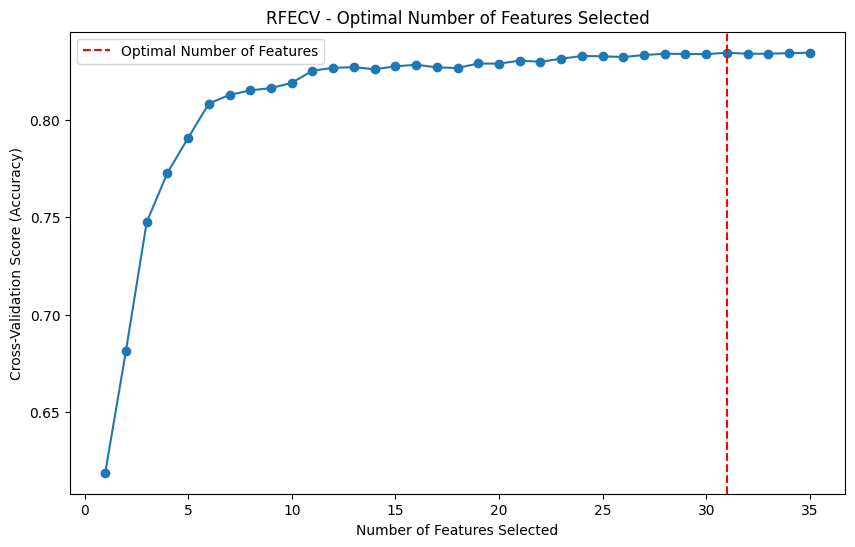

In [21]:
# Vẽ biểu đồ để quan sát số lượng đặc trưng và điểm số
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.title("RFECV - Optimal Number of Features Selected")  # Tiêu đề cập nhật
plt.axvline(x=rfecv.n_features_, color='r', linestyle='--', label='Optimal Number of Features')  # Đường thẳng cho số lượng tối ưu
plt.legend()  # Thêm chú thích
plt.show()

Huấn luyện lại mô hình với đặc trưng tối ưu

In [22]:
# 'X' là tập dữ liệu đầu vào đã qua RFE và 'y' là nhãn mục tiêu
X_selected = X[selected_features]  # Sử dụng các đặc trưng đã chọn từ RFECV

In [23]:
# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [24]:
# Huấn luyện lại mô hình trên các đặc trưng đã chọn
modelLG.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = modelLG.predict(X_test)
y_pred_proba = modelLG.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho ROC AUC

In [25]:
# In ra các kết quả đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Nếu là bài toán nhị phân, in thêm ROC AUC
if len(y.unique()) == 2:  # Kiểm tra nếu là phân loại nhị phân
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# In ra báo cáo chi tiết của mô hình
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8342161016949152
Precision: 0.8352094381048668
Recall: 0.8342161016949152
F1 Score: 0.8341499966015639
ROC AUC Score: 0.9108734102774747

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       934
           1       0.85      0.81      0.83       954

    accuracy                           0.83      1888
   macro avg       0.84      0.83      0.83      1888
weighted avg       0.84      0.83      0.83      1888



Điều chỉnh tham số Logistic Regression

In [26]:
from sklearn.model_selection import GridSearchCV
# Định nghĩa các tham số cần điều chỉnh
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Chọn l1 hoặc l2
    'solver': ['liblinear'],  # 'liblinear' hỗ trợ l1
    'max_iter': [100, 200, 300]  # Số lần lặp tối đa
}

In [27]:
grid_search = GridSearchCV(estimator=modelLG, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất và điểm số
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8358041909002853


In [28]:
# Dự đoán trên tập kiểm tra với mô hình tốt nhất
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho ROC AUC

# Tính toán và in các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred_best)
print("\nAccuracy on the entire dataset:", accuracy)

# In ma trận nhầm lẫn và các chỉ số đánh giá khác
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Accuracy on the entire dataset: 0.8347457627118644

Confusion Matrix:
[[801 133]
 [179 775]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       934
           1       0.85      0.81      0.83       954

    accuracy                           0.83      1888
   macro avg       0.84      0.83      0.83      1888
weighted avg       0.84      0.83      0.83      1888



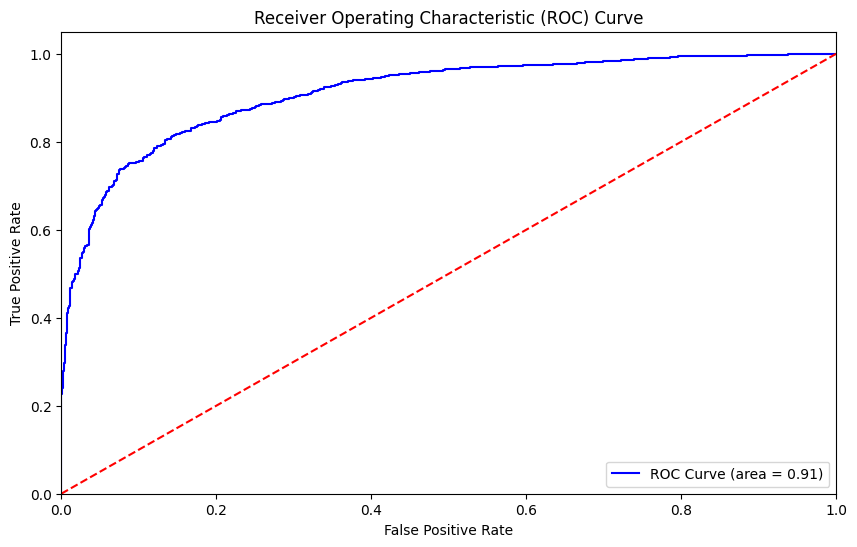

AUC Score: 0.9110664440045071


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Tính các giá trị cần thiết cho ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)  # Tính AUC

# Vẽ biểu đồ ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường chéo từ (0,0) đến (1,1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# In giá trị AUC
print("AUC Score:", roc_auc)

In [ ]:
# Lưu mô hình
joblib.dump(modelLG, '/content/drive/MyDrive/modelLG.joblib')
print("Mô hình đã được lưu vào file")

Mô hình đã được lưu vào file


In [30]:
# Đặt tên file cho mô hình đã lưu
model_filename = 'trained_model_LG.pkl'

# Lưu mô hình đã huấn luyện
joblib.dump(best_model, model_filename)
print("Mô hình đã được lưu vào file:", model_filename)

Mô hình đã được lưu vào file: trained_model_LG.pkl


In [31]:
# Tải mô hình đã lưu
loaded_model = joblib.load(model_filename)
print("Mô hình đã được tải thành công.")

Mô hình đã được tải thành công.


In [32]:
new_data = np.array([[1, 25, 1, 2, 3, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 70.5, 1200, 0, 20, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]])

# Sử dụng mô hình để dự đoán
predicted_value = loaded_model.predict(new_data)
predicted_proba = loaded_model.predict_proba(new_data)  # Xác suất dự đoán, nếu cần

print("Kết quả dự đoán:", predicted_value)
print("Xác suất dự đoán:", predicted_proba)

Kết quả dự đoán: [1]
Xác suất dự đoán: [[0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Xây dựng mô hình random forest


In [33]:
from sklearn.ensemble import RandomForestClassifier
# Khởi tạo mô hình Random Forest
modelRF = RandomForestClassifier(random_state=42)

In [34]:
# Khởi tạo RFECV với cross-validation 5-fold
rfecv = RFECV(estimator=modelRF, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Huấn luyện RFECV trên dữ liệu
rfecv.fit(X, y)

# Số lượng đặc trưng tối ưu
print("Optimal number of features:", rfecv.n_features_)

# Danh sách các đặc trưng quan trọng được chọn
selected_features = X.columns[rfecv.support_]
print("Selected Features:", selected_features)

Optimal number of features: 31
Selected Features: Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Paperless Billing',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Offer_Offer B', 'Offer_Offer D',
       'Offer_Offer E', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_No', 'Contract_One Year', 'Contract_Two Year',
       'Payment Method_Credit Card'],
      dtype='object')


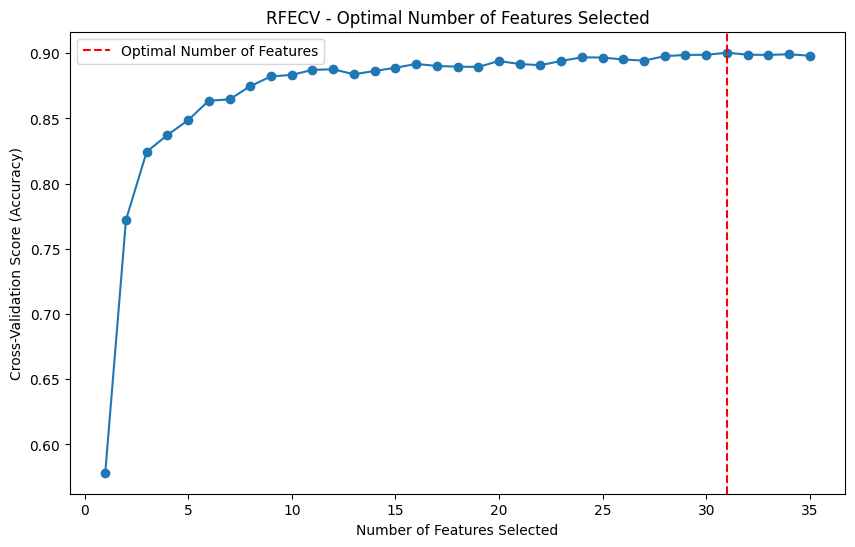

In [35]:
# Vẽ biểu đồ để quan sát số lượng đặc trưng và điểm số
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.title("RFECV - Optimal Number of Features Selected")  # Tiêu đề cập nhật
plt.axvline(x=rfecv.n_features_, color='r', linestyle='--', label='Optimal Number of Features')  # Đường thẳng cho số lượng tối ưu
plt.legend()  # Thêm chú thích
plt.show()

In [36]:
# Sử dụng các đặc trưng đã chọn từ RFECV
X_selected = X[selected_features]

# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [37]:
# Huấn luyện lại mô hình trên các đặc trưng đã chọn
modelRF.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = modelRF.predict(X_test)
y_pred_proba = modelRF.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho ROC AUC

In [38]:
# In ra các kết quả đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Nếu là bài toán nhị phân, in thêm ROC AUC
if len(y.unique()) == 2:  # Kiểm tra nếu là phân loại nhị phân
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# In ra báo cáo chi tiết của mô hình
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8983050847457628
Precision: 0.8988609338173048
Recall: 0.8983050847457628
F1 Score: 0.8982915039226609
ROC AUC Score: 0.9655962273129256

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       934
           1       0.91      0.88      0.90       954

    accuracy                           0.90      1888
   macro avg       0.90      0.90      0.90      1888
weighted avg       0.90      0.90      0.90      1888



Điều chỉnh tham số

In [39]:
# Sử dụng các đặc trưng đã chọn từ RFECV
X_selected = X[selected_features]

# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [40]:
# Khởi tạo GridSearchCV để điều chỉnh tham số cho Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Số lượng cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # Số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số lượng mẫu tối thiểu trong một nút lá
}
grid_search = GridSearchCV(estimator=modelRF, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

In [42]:
# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất và điểm số
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.8938015699440308


In [43]:
# Dự đoán trên tập kiểm tra với mô hình tốt nhất
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho ROC AUC

# Tính toán và in các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred_best)
print("\nAccuracy on the entire dataset:", accuracy)

# In ma trận nhầm lẫn và các chỉ số đánh giá khác
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Accuracy on the entire dataset: 0.899364406779661

Confusion Matrix:
[[857  77]
 [113 841]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       934
           1       0.92      0.88      0.90       954

    accuracy                           0.90      1888
   macro avg       0.90      0.90      0.90      1888
weighted avg       0.90      0.90      0.90      1888



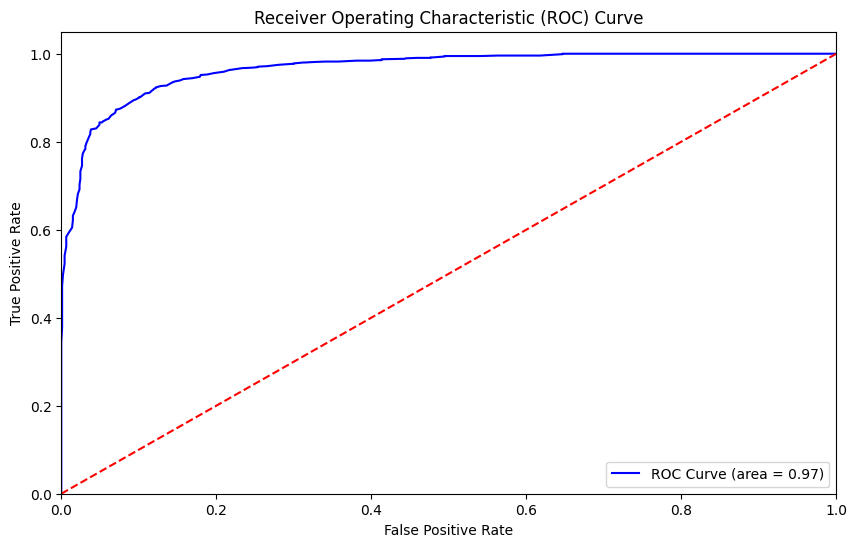

AUC Score: 0.9656977944774396


In [ ]:
# Tính các giá trị cần thiết cho ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)  # Tính AUC

# Vẽ biểu đồ ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường chéo từ (0,0) đến (1,1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# In giá trị AUC
print("AUC Score:", roc_auc)

In [ ]:
# Lưu mô hình
joblib.dump(modelRF, '/content/drive/MyDrive/modelRF.joblib')
print("Mô hình đã được lưu vào file")

Mô hình đã được lưu vào file


In [44]:
# Lưu mô hình
model_filename = 'trained_model_RD.pkl'
joblib.dump(grid_search.best_estimator_, model_filename)
print("Mô hình đã được lưu vào file::", model_filename)

Mô hình đã được lưu vào file:: trained_model_RD.pkl


In [45]:
# Tải mô hình đã lưu và sử dụng để dự đoán giá trị mới
loaded_model = joblib.load(model_filename)
print("Mô hình đã được tải thành công.")

Mô hình đã được tải thành công.


In [46]:
# Ví dụ dự đoán với một giá trị mới
new_data = np.array([[1, 25, 1, 0, 1, 30, 1, 1, 50, 1, 1, 1, 1, 1, 1, 1, 1, 70, 1500, 100, 10, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1]])
predicted_value = loaded_model.predict(new_data)
print("Kết quả dự đoán:", predicted_value)

Kết quả dự đoán: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


XGBOOST

In [47]:
from xgboost import XGBClassifier
# Khởi tạo mô hình XGBoost
modelXGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [48]:
# Khởi tạo RFECV với cross-validation 5-fold
rfecv = RFECV(estimator=modelXGB, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Huấn luyện RFECV trên dữ liệu
rfecv.fit(X, y)

# Số lượng đặc trưng tối ưu
print("Optimal number of features:", rfecv.n_features_)

# Danh sách các đặc trưng quan trọng được chọn
selected_features = X.columns[rfecv.support_]
print("Selected Features:", selected_features)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Optimal number of features: 33
Selected Features: Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Contract_One Year', 'Contract_Two Year',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check'],
      dtype='object')


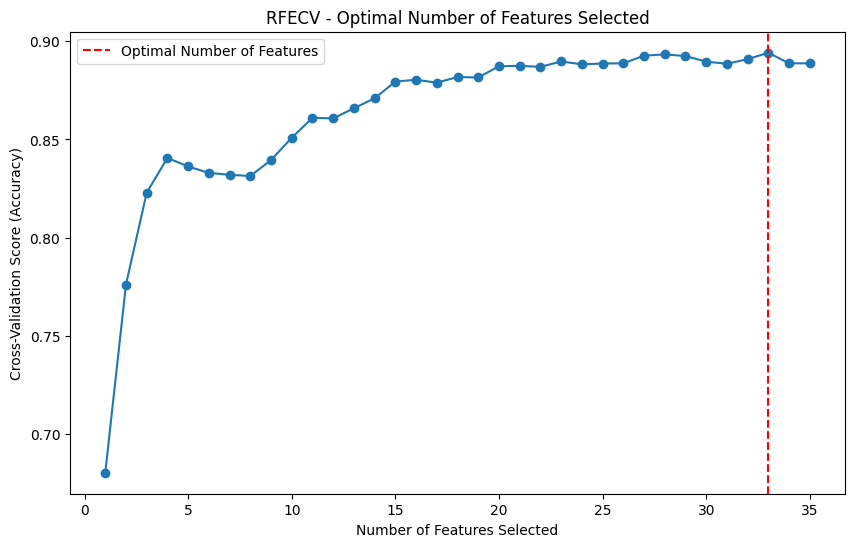

In [ ]:
# Vẽ biểu đồ để quan sát số lượng đặc trưng và điểm số
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.title("RFECV - Optimal Number of Features Selected")  # Tiêu đề cập nhật
plt.axvline(x=rfecv.n_features_, color='r', linestyle='--', label='Optimal Number of Features')  # Đường thẳng cho số lượng tối ưu
plt.legend()  # Thêm chú thích
plt.show()

In [49]:
# 'X' là tập dữ liệu đầu vào đã qua RFE và 'y' là nhãn mục tiêu
X_selected = X[selected_features]  # Sử dụng các đặc trưng đã chọn từ RFECV

# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [50]:
# Huấn luyện lại mô hình trên các đặc trưng đã chọn
modelXGB.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [52]:
# Dự đoán trên tập kiểm tra
y_pred = modelXGB.predict(X_test)
y_pred_proba = modelXGB.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho ROC AUC

# In ra các kết quả đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# In ra báo cáo chi tiết của mô hình
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9014830508474576
Precision: 0.901980039646446
Recall: 0.9014830508474576
F1 Score: 0.9014724374178553

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       934
           1       0.92      0.89      0.90       954

    accuracy                           0.90      1888
   macro avg       0.90      0.90      0.90      1888
weighted avg       0.90      0.90      0.90      1888



Điều chỉnh tham số XGBOOST

In [53]:
# Định nghĩa các tham số cần điều chỉnh cho GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=modelXGB, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

In [54]:
# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất và điểm số
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:33:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
Best Cross-Validation Score: 0.8910220414531844


In [55]:
# Dự đoán trên tập kiểm tra với mô hình tốt nhất
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho ROC AUC

# Tính toán và in các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred_best)
print("\nAccuracy on the entire dataset:", accuracy)

# In ma trận nhầm lẫn và các chỉ số đánh giá khác
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Accuracy on the entire dataset: 0.909957627118644

Confusion Matrix:
[[865  69]
 [101 853]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       934
           1       0.93      0.89      0.91       954

    accuracy                           0.91      1888
   macro avg       0.91      0.91      0.91      1888
weighted avg       0.91      0.91      0.91      1888



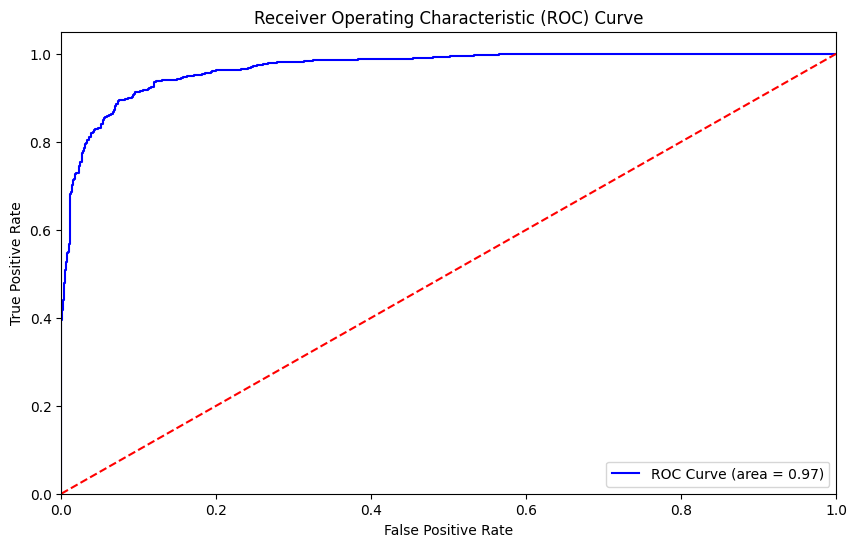

AUC Score: 0.9681393344376658


In [ ]:
# Tính các giá trị cần thiết cho ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)  # Tính AUC

# Vẽ biểu đồ ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường chéo từ (0,0) đến (1,1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# In giá trị AUC
print("AUC Score:", roc_auc)

In [ ]:
# Lưu mô hình
joblib.dump(modelXGB, '/content/drive/MyDrive/modelXGB.joblib')
print("Mô hình đã được lưu vào file")

Mô hình đã được lưu vào file


In [56]:
# Lưu mô hình
model_filename = 'trained_model_xgb.pkl'
joblib.dump(best_model, model_filename)
print("Mô hình đã được tải thành công.")

Mô hình đã được tải thành công.


In [57]:
# Tải mô hình đã lưu
loaded_model = joblib.load(model_filename)
print("Mô hình đã được tải thành công.")

Mô hình đã được tải thành công.


In [58]:
new_data = np.array([[1, 45, 0, 2, 3, 20.5, 1, 1, 50, 1, 1, 0, 0, 1, 1, 0, 1, 1, 25.75, 100.5, 5.5, 10,
                      0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]])

# Dự đoán với mẫu dữ liệu mới
predicted_class = loaded_model.predict(new_data)

print("Predicted Class:", predicted_class)

Predicted Class: [1]


# **K-Means**

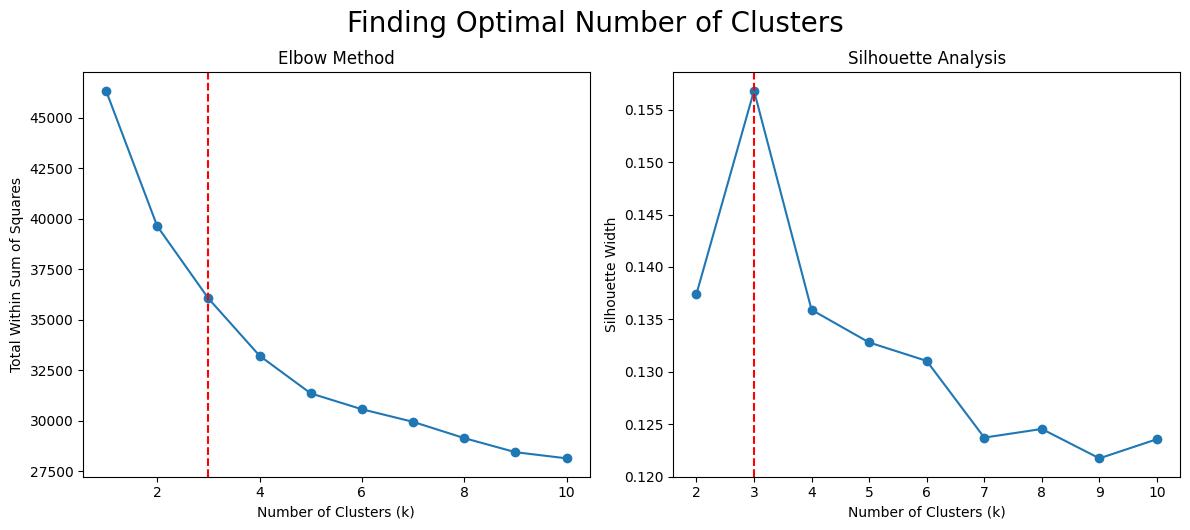

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



# Phương pháp Elbow để tìm số cụm tối ưu
tot_withinss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    tot_withinss.append(kmeans.inertia_)  # Lưu tổng biến thiên bên trong

# Tạo DataFrame cho phương pháp Elbow
elbow_df = pd.DataFrame({
    'k': k_range,
    'tot_withinss': tot_withinss
})

# Phân tích Silhouette
sil_width = []
k_silhouette_range = range(2, 11)

for k in k_silhouette_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    sil_width.append(silhouette_score(X, cluster_labels))  # Tính toán chiều rộng silhouette

# Tạo DataFrame cho phân tích Silhouette
sil_df = pd.DataFrame({
    'k': k_silhouette_range,
    'sil_width': sil_width
})

# Vẽ biểu đồ Elbow
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(elbow_df['k'], elbow_df['tot_withinss'], marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Within Sum of Squares')
plt.axvline(x=3, color='red', linestyle='--')

# Vẽ biểu đồ Silhouette
plt.subplot(1, 2, 2)
plt.plot(sil_df['k'], sil_df['sil_width'], marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Width')
plt.axvline(x=3, color='red', linestyle='--')

plt.tight_layout()
plt.suptitle('Finding Optimal Number of Clusters', fontsize=20, y=1.05)
plt.show()


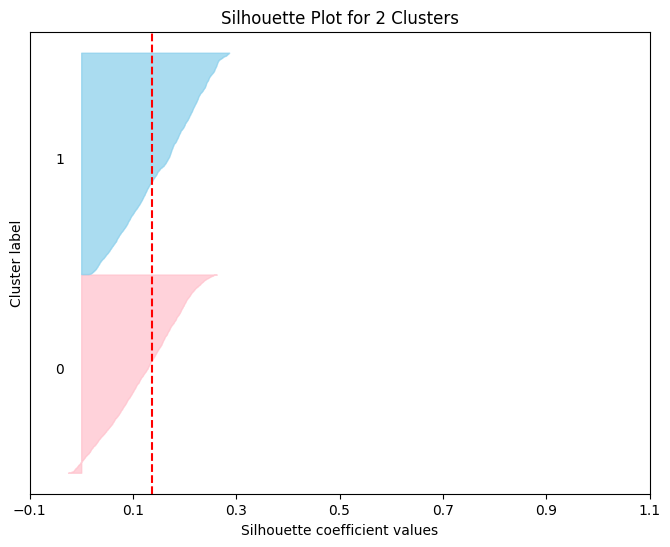

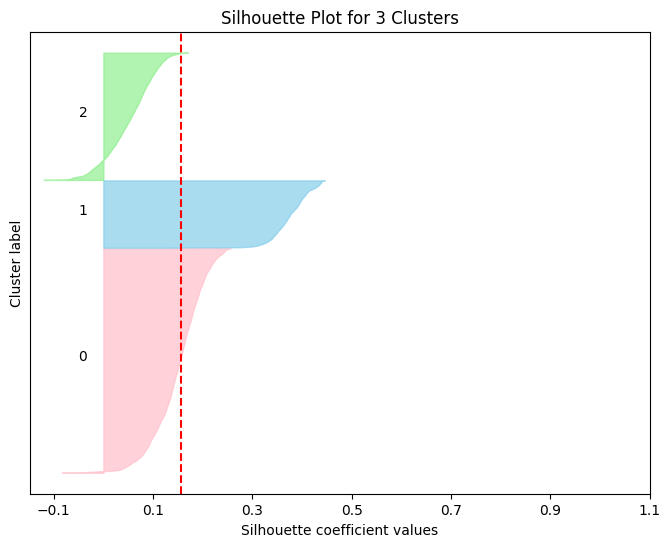

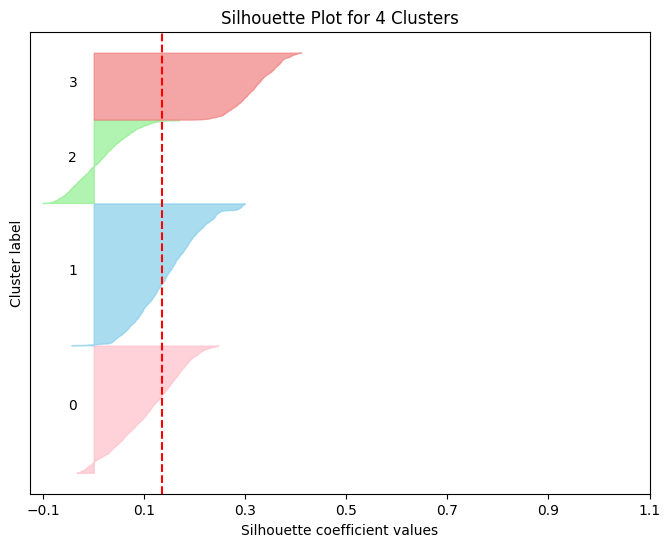

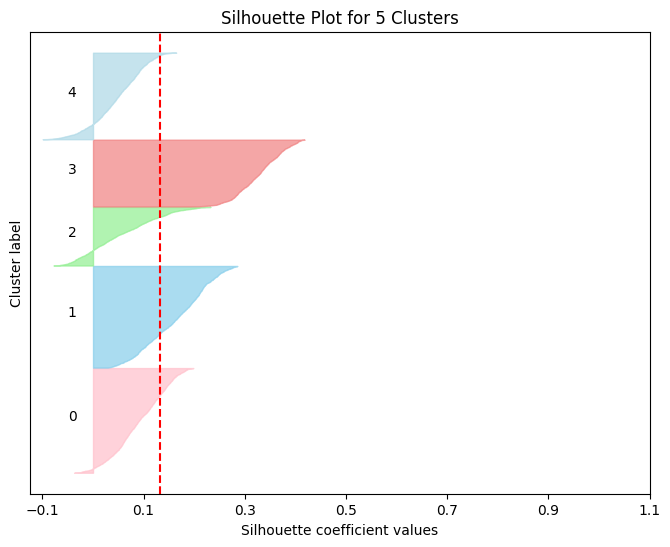

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Lặp qua các giá trị của K từ 2 đến 5
for n_clusters in range(2, 6):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Phân cụm dữ liệu với số cụm là n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Tính toán silhouette score trung bình và silhouette score cho mỗi điểm
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Thiết lập giới hạn cho trục y để không gian đủ lớn cho tất cả các điểm
    y_lower = 10

    # Màu cho từng cụm, đủ số màu cho các cụm (mở rộng nếu cần)
    colors = ['pink', 'skyblue', 'lightgreen', 'lightcoral', 'lightblue']

    for i in range(n_clusters):
        # Lọc các silhouette scores của các điểm thuộc cụm i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Tính số lượng điểm trong cụm i
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Chọn màu cho cụm i
        color = colors[i % len(colors)]  # Đảm bảo đủ màu
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Gắn nhãn cho cụm i
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Điều chỉnh giới hạn y cho cụm tiếp theo
        y_lower = y_upper + 10  # 10 cho khoảng cách giữa các cụm

    # Vẽ đường biểu diễn Silhouette Score trung bình
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Đặt tên cho các trục và tiêu đề
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.set_title(f"Silhouette Plot for {n_clusters} Clusters")

    # Ẩn các giá trị y không cần thiết
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # Hiển thị biểu đồ
    plt.show()


K = 2 có vẻ là lựa chọn tốt hơn vì có ít giá trị âm hơn và các cụm có sự phân tách rõ ràng hơn so với K = 3.

In [ ]:
# Giả sử dữ liệu X là một DataFrame với các feature bạn muốn phân cụm
Scaler = MinMaxScaler()
data_scaled = Scaler.fit_transform(X)  # Chuẩn hóa dữ liệu

Đặc điểm các cụm:
     Gender       Age   Married  Number of Dependents  Number of Referrals  \
0  0.493411  0.481425  0.540541              0.035259             0.160471   
1  0.487810  0.461412  0.356438              0.044053             0.106255   

   Phone Service  Avg Monthly Long Distance Charges  Multiple Lines  \
0       0.924056                           0.481775        0.628993   
1       0.881120                           0.443000        0.254886   

   Internet Service  Avg Monthly GB Download  ...  Offer_Offer C  \
0          1.000000                 0.291516  ...       0.068573   
1          0.696152                 0.191318  ...       0.053798   

   Offer_Offer D  Offer_Offer E  Internet Type_DSL  Internet Type_Fiber Optic  \
0       0.071030       0.071923           0.189413                   0.723699   
1       0.110619       0.200887           0.251864                   0.338505   

   Internet Type_No  Contract_One Year  Contract_Two Year  \
0      6.633583e-15    

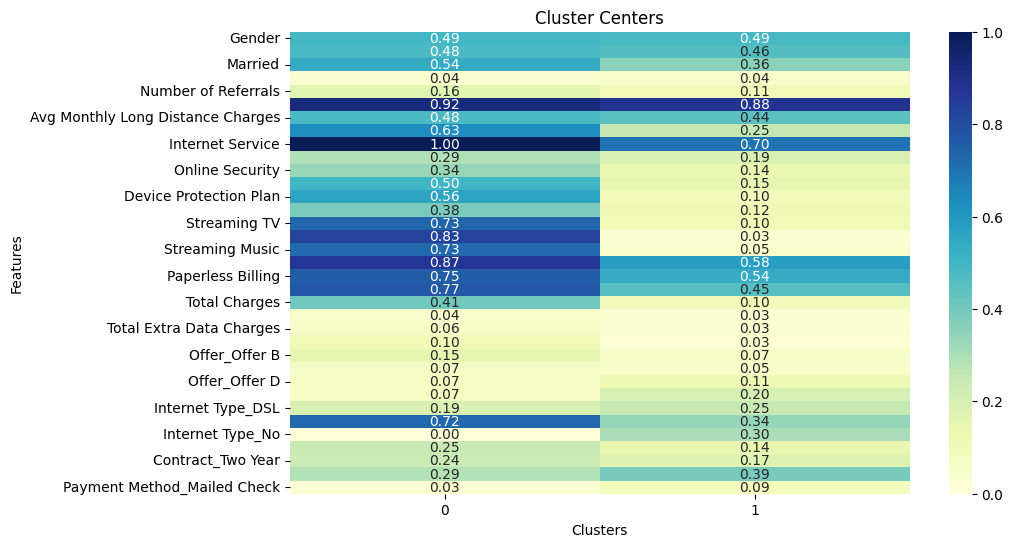

In [ ]:
# Phân cụm với KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Create a new DataFrame for clustered data
# Instead of directly assigning to 'df', create a new DataFrame
clustered_df = pd.DataFrame(X) # Create a copy of X
clustered_df['Cluster'] = kmeans.labels_  # Assign cluster labels to the new DataFrame

# Đặc điểm của các cụm
cluster_centers = Scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Đặc điểm các cụm:")
print(cluster_df)

# Số điểm trong mỗi cụm
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
print("\nSố điểm trong mỗi cụm:")
print(cluster_counts)
# Hiển thị đặc điểm các cụm dưới dạng heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_df.T, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Cluster Centers')
plt.xlabel('Clusters')
plt.ylabel('Features')
plt.show()